In [15]:
from bs4 import BeautifulSoup
import requests
import numpy as np

In [2]:
url = requests.get('https://en.wikipedia.org/wiki/Transistor_count').text

In [3]:
#pull html from wiki page
soup = BeautifulSoup(url, 'lxml')
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Transistor count - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"3585716e-c178-4361-a9e2-5eb3f998b9c8","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Transistor_count","wgTitle":"Transistor count","wgCurRevisionId":1040248385,"wgRevisionId":1040248385,"wgArticleId":4469365,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 German-language sources (de)","Articles with short description","Short description is different from Wikidata","Use mdy dates from Janua

In [4]:
#locate the wikitable in the page
ttable = soup.find('table', {'class', 'wikitable sortable'})
ttable

<table class="wikitable sortable" style="text-align:left;">
<tbody><tr>
<th><a href="/wiki/Microprocessor" title="Microprocessor">Processor</a>
</th>
<th data-sort-type="number"><a class="mw-redirect" href="/wiki/MOS_transistor" title="MOS transistor">MOS transistor</a> count
</th>
<th>Date of<br/>introduction
</th>
<th>Designer
</th>
<th data-sort-type="number"><a href="/wiki/MOSFET" title="MOSFET">MOS</a> <a href="/wiki/Semiconductor_device_fabrication" title="Semiconductor device fabrication">process</a><br/>(<a href="/wiki/Nanometre" title="Nanometre">nm</a>)
</th>
<th data-sort-type="number">Area (<a href="/wiki/Millimetre" title="Millimetre">mm</a><sup>2</sup>)
</th></tr>
<tr>
<td><a class="mw-redirect" href="/wiki/MP944" title="MP944">MP944</a> (20-bit, 6-chip, 28 chips total)
</td>
<td>74,442 (5,360 excl. ROM &amp; RAM)<sup class="reference" id="cite_ref-24"><a href="#cite_note-24">[24]</a></sup><sup class="reference" id="cite_ref-25"><a href="#cite_note-25">[25]</a></sup>
</td

In [5]:
#make a list of all table row entries & remove titles
rows = ttable.find_all('tr')
rows.pop(0)

<tr>
<th><a href="/wiki/Microprocessor" title="Microprocessor">Processor</a>
</th>
<th data-sort-type="number"><a class="mw-redirect" href="/wiki/MOS_transistor" title="MOS transistor">MOS transistor</a> count
</th>
<th>Date of<br/>introduction
</th>
<th>Designer
</th>
<th data-sort-type="number"><a href="/wiki/MOSFET" title="MOSFET">MOS</a> <a href="/wiki/Semiconductor_device_fabrication" title="Semiconductor device fabrication">process</a><br/>(<a href="/wiki/Nanometre" title="Nanometre">nm</a>)
</th>
<th data-sort-type="number">Area (<a href="/wiki/Millimetre" title="Millimetre">mm</a><sup>2</sup>)
</th></tr>

In [6]:
rows

[<tr>
 <td><a class="mw-redirect" href="/wiki/MP944" title="MP944">MP944</a> (20-bit, 6-chip, 28 chips total)
 </td>
 <td>74,442 (5,360 excl. ROM &amp; RAM)<sup class="reference" id="cite_ref-24"><a href="#cite_note-24">[24]</a></sup><sup class="reference" id="cite_ref-25"><a href="#cite_note-25">[25]</a></sup>
 </td>
 <td>1970<sup class="reference" id="cite_ref-F-14_22-1"><a href="#cite_note-F-14-22">[22]</a></sup><sup class="reference" id="cite_ref-26"><a href="#cite_note-26">[a]</a></sup>
 </td>
 <td><a href="/wiki/Garrett_AiResearch" title="Garrett AiResearch">Garrett AiResearch</a>
 </td>
 <td><i><b>?</b></i>
 </td>
 <td><i><b>?</b></i>
 </td></tr>,
 <tr>
 <td><a href="/wiki/Intel_4004" title="Intel 4004">Intel 4004</a> (4-bit, 16-pin)
 </td>
 <td>2,250
 </td>
 <td>1971
 </td>
 <td><a href="/wiki/Intel" title="Intel">Intel</a>
 </td>
 <td><a href="/wiki/10_%C2%B5m_process" title="10 µm process">10,000 nm</a>
 </td>
 <td>12 mm<sup>2</sup>
 </td></tr>,
 <tr>
 <td><a href="/wiki/Micr

In [7]:
#pull transistor numbers and years from rows and append them to lists
tnum = []
years = []
for row in rows:
    l = list(row.children)
    tr = str(l[3])
    st = tr.index('>') + 1
    #weird exception case for a 2-width row
    if st > 4 or len(l)< 6:
        continue
    i = st
    while tr[i].isdecimal() or tr[i] == ',':
        i = i + 1
    end = i
    trans = int(tr[st:end].replace(',', ''))
    tnum.append(trans)
    y = str(l[5])
    st = y.index('>') + 1
    end = y.index('<', 1)
    years.append(int(y[st:end]))

#append weird 2 row exception case
tnum.append(2000000000)
years.append(2015)

In [18]:
years, tnum

([1970,
  1971,
  1971,
  1972,
  1973,
  1973,
  1974,
  1974,
  1974,
  1974,
  1975,
  1975,
  1975,
  1976,
  1976,
  1976,
  1976,
  1977,
  1978,
  1978,
  1979,
  1979,
  1979,
  1980,
  1981,
  1981,
  1982,
  1982,
  1983,
  1984,
  1984,
  1985,
  1985,
  1985,
  1986,
  1986,
  1986,
  1986,
  1987,
  1987,
  1987,
  1987,
  1988,
  1988,
  1989,
  1989,
  1989,
  1989,
  1990,
  1991,
  1991,
  1992,
  1992,
  1992,
  1993,
  1993,
  1994,
  1994,
  1994,
  1994,
  1995,
  1995,
  1996,
  1997,
  1997,
  1997,
  1997,
  1997,
  1998,
  1999,
  1999,
  1999,
  1999,
  1999,
  1999,
  2000,
  2000,
  2000,
  2001,
  2001,
  2002,
  2002,
  2003,
  2003,
  2003,
  2003,
  2004,
  2004,
  2004,
  2005,
  2005,
  2005,
  2005,
  2006,
  2006,
  2006,
  2006,
  2007,
  2007,
  2007,
  2007,
  2007,
  2007,
  2007,
  2008,
  2008,
  2008,
  2008,
  2008,
  2008,
  2009,
  2009,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2011,
  2011,
  2011,
  2011,
  2012,
  2012,
  2012,


In [28]:
#apply log base 2 transform of data to make relation between transistor number and year more obvious
import math
ltnum = [math.log(num, 2) for num in tnum]
print(ltnum)

[16.183829195711173, 11.135709286104401, 11.58777751632821, 11.77313920671969, 11.287712379549449, 13.425215903299385, 11.550746785383243, 12.001408194392809, 12.550746785383243, 12.965784284662087, 12.144658242831884, 11.965784284662087, 12.28771237954945, 12.28771237954945, 13.053247125912428, 12.666224002803178, 12.965784284662087, 12.77313920671969, 13.135709286104401, 14.82376527978966, 14.095067301607056, 14.82376527978966, 16.053247125912424, 15.609640474436812, 13.4893462407191, 15.45763738099176, 15.747143998186745, 17.03187347511986, 14.425215903299385, 15.943064208162005, 17.535639892993036, 18.06907209307411, 14.609640474436812, 13.965784284662087, 16.747143998186747, 18.516531070045332, 14.720671786825555, 16.47357892486078, 18.55449892024435, 19.47753693842947, 18.05854142558194, 19.076919954896795, 17.457637380991763, 17.931568569324174, 19.194602975157967, 19.931568569324174, 20.170642716690455, 18.241908689936324, 20.194602975157967, 20.364527976600282, 15.095067301607

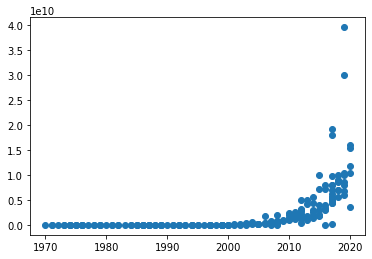

In [29]:
#plot raw data
import matplotlib.pyplot as plt
plt.plot(years, tnum, 'o')

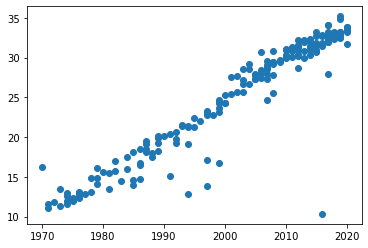

In [30]:
#plot with log transform
plt.plot(years, ltnum, 'o')

In [31]:
#compute summations of x_m, y_m, x^2_m, x_m*y_m where M is number of entries
m = len(years)
yearspast1970 = [float(year - 1970) for year in years]
xbar = 0
ybar = 0
xybar = 0
x2bar = 0
for i in range(0, m):
    xbar = xbar + yearspast1970[i]
    ybar = ybar + ltnum[i]
    x2bar = x2bar + yearspast1970[i] ** 2
    xybar = xybar + ltnum[i] * yearspast1970[i]
print(xbar)
print(ybar)
print(xybar)
print(x2bar)

6115.0
4841.954239830337
173775.4953412702
235817.0


In [32]:
#compute estimated least squares solution vector a1hat and a2hat from formula
det = (x2bar - m * xbar ** 2)
a1hat = (xybar - m * xbar * ybar) / det
a2hat = (ybar * x2bar - xbar * xybar) / det
print(a1hat, '\n', a2hat)

0.7918177054021395 
 -0.011028703745525129


In [33]:
#convert to np array to make math operations easier
yearspast1970 = np.array(yearspast1970)

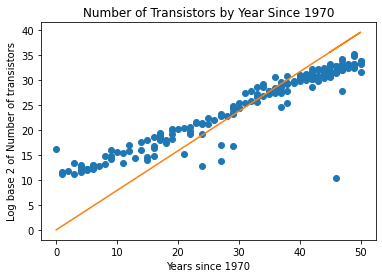

In [34]:
#plot data with least squares estimate
plt.plot(yearspast1970, ltnum, 'o')
plt.plot(yearspast1970, yearspast1970 * a1hat + a2hat)
plt.title('Number of Transistors by Year Since 1970')
plt.ylabel('Log base 2 of Number of transistors')
plt.xlabel('Years since 1970')
plt.savefig('mooreslaw.jpg')